<a href="https://colab.research.google.com/github/ykpercy/ideas/blob/master/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**程序内容：使用VGG16模型对mnist数据进行训练并测试**

VGG16模型因其网络架构，其对输入形状要求至少为（32,32,1）；

而mnist数据的图片都是（28,28,1）；

所以第一步需要对图片进行填充预处理，以适应VGG16的网络结构

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
keras.__version__ 


'2.2.4'

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [41]:
train_images[1].shape

(28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_labels.shape

(10000,)

In [9]:
train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

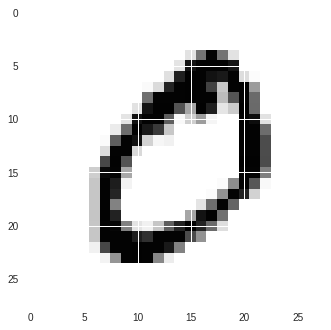

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1])

In [14]:
train_labels[1]

0

In [13]:
type(train_images)

numpy.ndarray

In [32]:
#use the tf.pad() to pad the mnist picture from (28,28) to (32,32)
with tf.Session() as sess:
     train_images_pad = tf.pad(train_images,[[0,0],[2,2],[2,2]],constant_values=0)
#sess = tf.InteractiveSession()
     print(train_images_pad)


Tensor("Pad_3:0", shape=(60000, 32, 32), dtype=uint8)


In [69]:
train_images_pad

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
train_images_pad=train_images_pad.eval()

In [70]:
train_images_pad.shape

(60000, 32, 32)

In [59]:
with tf.Session() as sess:
     test_images_pad = tf.pad(test_images,[[0,0],[2,2],[2,2]],constant_values=0)
#sess = tf.InteractiveSession()
     print(test_images_pad)

Tensor("Pad_4:0", shape=(10000, 32, 32), dtype=uint8)


In [0]:
test_images_pad=test_images_pad.eval()

In [0]:
test_images_pad.shape

In [72]:
test_images_pad[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [57]:
print(train_images_pad[0,1:100])
    #plt.imshow(train_images_pad[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18
  126 136 175  26 166 255 247 127   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253

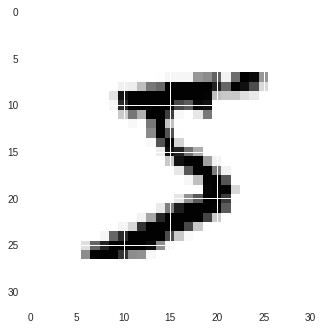

In [73]:

plt.imshow(train_images_pad[0])
    #plt.show()

以下注释代码为第一次尝试使用numpy自带填充函数，经试验发现该步骤运行时间特别长，在2小时左右，不合适。遂改用另外一种方法

In [0]:
#the first method to pad picture,this way is too slow

#final=np.zeros((32,32))
#for i in range(60000):
#    #tem=b[i]
#    tem=np.pad(train_images[i],(2,), 'edge')
#    final=np.concatenate((final,tem),axis = 0)
#print(final)

In [0]:
#final.shape

In [0]:
#train_images_pad=final[32:].reshape(60000,32,32)

In [0]:
#train_images_pad.shape

In [0]:
#train_labels.shape

In [0]:
#final_test=np.zeros((32,32))
#for i in range(10000):
#    #tem=b[i]
#    tem_test=np.pad(test_images[i],(2,), 'edge')
#    final_test=np.concatenate((final_test,tem_test),axis = 0)
#print(final_test)

In [0]:
#final_test.shape

In [0]:
#test_images_pad=final_test[32:].reshape(10000,32,32)

In [0]:
#test_images_pad.shape

In [62]:
#test_images_pad[0].shape

(32, 32)

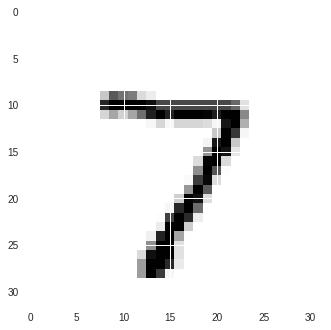

In [63]:
plt.imshow(test_images_pad[0])

In [64]:
test_labels[0]

7

In [0]:
#import the model VGG16

from keras.applications import VGG16

conv_base = VGG16(weights=None,
                  include_top=False,
                  input_shape=(32, 32, 1))

In [63]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [0]:
from keras.utils import to_categorical

train_images_pad = train_images_pad.reshape((60000, 32, 32, 1))
train_images_pad = train_images_pad.astype('float32') / 255

test_images_pad = test_images_pad.reshape((10000, 32, 32, 1))
test_images_pad = test_images_pad.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [75]:
train_labels.shape

(60000, 10)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [0]:
conv_base.trainable = True

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14713536  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 14,847,434
Trainable params: 14,847,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [80]:
train_labels.shape

(60000, 10)

In [81]:
history=model.fit(train_images_pad, train_labels, epochs=5, batch_size=20)

Epoch 1/5
60000/60000 [==============================] - 224s 4ms/step - loss: 1.0795 - acc: 0.3435
Epoch 2/5
60000/60000 [==============================] - 221s 4ms/step - loss: 1.1921e-07 - acc: 0.0987
Epoch 3/5
60000/60000 [==============================] - 222s 4ms/step - loss: 1.1921e-07 - acc: 0.0987
Epoch 4/5
60000/60000 [==============================] - 221s 4ms/step - loss: 1.1921e-07 - acc: 0.0987
Epoch 5/5
60000/60000 [==============================] - 221s 4ms/step - loss: 1.1921e-07 - acc: 0.0987


In [82]:
#increase the batch_size
history_1=model.fit(train_images_pad, train_labels, epochs=5, batch_size=150)

Epoch 1/5
60000/60000 [==============================] - 67s 1ms/step - loss: 1.1921e-07 - acc: 0.0987
Epoch 2/5
60000/60000 [==============================] - 65s 1ms/step - loss: 1.1921e-07 - acc: 0.0987
Epoch 3/5
60000/60000 [==============================] - 65s 1ms/step - loss: 1.1921e-07 - acc: 0.0987
Epoch 4/5
60000/60000 [==============================] - 65s 1ms/step - loss: 1.1921e-07 - acc: 0.0987
Epoch 5/5
60000/60000 [==============================] - 65s 1ms/step - loss: 1.1921e-07 - acc: 0.0987


In [0]:
#add the Dropout Layer
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [0]:
conv_base.trainable = True

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14713536  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 14,847,434
Trainable params: 14,847,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [87]:
history_2=model.fit(train_images_pad, train_labels, epochs=5, batch_size=50)

Epoch 1/5
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3017 - acc: 0.1123
Epoch 2/5
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3013 - acc: 0.1124
Epoch 3/5
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3013 - acc: 0.1124
Epoch 4/5
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3012 - acc: 0.1124
Epoch 5/5
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3013 - acc: 0.1124


In [89]:
test_loss, test_acc = model.evaluate(test_images_pad, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 6s 627us/step
test_acc: 0.1135
